# DecisionTree 분류 모델을 이용한 타이타닉 데이터 분류

## 데이터 불러오기

In [ ]:
### 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
### 데이터 불러오기

# 파일 경로 설정하기
file_path='/content/drive/MyDrive/데이터 분석/titanic_preprocessed2.csv'

# csv file --> DataFrame 자료형 생성
df = pd.read_csv(file_path)

# 결과 확인하기
print(df)

      Survived  Pclass  Gender  Age  SibSp  Parch      Fare Embarked  \
0            0       3    male    2      1      0    7.2500        S   
1            1       1  female    3      1      0   71.2833        C   
2            1       3  female    2      0      0    7.9250        S   
3            1       1  female    3      1      0   53.1000        S   
4            0       3    male    3      0      0    8.0500        S   
...        ...     ...     ...  ...    ...    ...       ...      ...   
1304         0       3    male    2      0      0    8.0500        S   
1305         1       1  female    3      0      0  108.9000        C   
1306         0       3    male    3      0      0    7.2500        S   
1307         0       3    male    2      0      0    8.0500        S   
1308         0       3    male    2      1      1   22.3583        C   

      num_family   title  
0              1      Mr  
1              1     Mrs  
2              0    Miss  
3              1     Mrs  


## 데이터 전처리

In [ ]:
### 인코딩 --> 범주형 컬럼 : 문자열 --> 숫자

# np.unique() --> 범주형 컬럼 : 문자열 항목 --> 알파벳 순으로 정렬
arr = df.loc[:,'title'].values
kinds= np.unique(ar=arr)
print(f'title 컬럼의 항목 확인 : \n{kinds}')

print('-'*80)

# replace() 함수 --> label 인코딩
df = df.replace({'female':0,
            'male':1,
            kinds[0]:0,
            kinds[1]:1,
            kinds[2]:2,
            kinds[3]:3,
            kinds[4]:4})
print(df)

title 컬럼의 항목 확인 : 
['Master' 'Miss' 'Mr' 'Mrs' 'others']
--------------------------------------------------------------------------------
      Survived  Pclass  Gender  Age  SibSp  Parch      Fare Embarked  \
0            0       3       1    2      1      0    7.2500        S   
1            1       1       0    3      1      0   71.2833        C   
2            1       3       0    2      0      0    7.9250        S   
3            1       1       0    3      1      0   53.1000        S   
4            0       3       1    3      0      0    8.0500        S   
...        ...     ...     ...  ...    ...    ...       ...      ...   
1304         0       3       1    2      0      0    8.0500        S   
1305         1       1       0    3      0      0  108.9000        C   
1306         0       3       1    3      0      0    7.2500        S   
1307         0       3       1    2      0      0    8.0500        S   
1308         0       3       1    2      1      1   22.3583        C  

## 학습용 데이터와 평가용 데이터 생성하기

In [ ]:
### X_data / y_data 생성

# X_data 생성
X_data = df.drop(columns=['Survived', 'Embarked'])

# y_data 생성
y_data = df.loc[:,'Survived']

# 결과 확인하기
print(f'X_data 확인 : \n{X_data}')
print('-'*80)
print(f'y_data 확인 : \n{y_data}')

X_data 확인 : 
      Pclass  Gender  Age  SibSp  Parch      Fare  num_family  title
0          3       1    2      1      0    7.2500           1      2
1          1       0    3      1      0   71.2833           1      3
2          3       0    2      0      0    7.9250           0      1
3          1       0    3      1      0   53.1000           1      3
4          3       1    3      0      0    8.0500           0      2
...      ...     ...  ...    ...    ...       ...         ...    ...
1304       3       1    2      0      0    8.0500           0      2
1305       1       0    3      0      0  108.9000           0      4
1306       3       1    3      0      0    7.2500           0      2
1307       3       1    2      0      0    8.0500           0      2
1308       3       1    2      1      1   22.3583           2      0

[1309 rows x 8 columns]
--------------------------------------------------------------------------------
y_data 확인 : 
0       0
1       1
2       1
3       1


In [ ]:
### 70 : 30의 비율로 학습용 데이터와 평가용 데이터 생성

# 필요한 함수 import
from sklearn.model_selection import train_test_split

# train_test_split() 함수 사용
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=y_data)

In [ ]:
### 학습용 데이터 확인

# 모양 확인
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')

print('-'*80)

# 인덱스 확인
print(f'X_train의 인덱스 : \n{X_train.index}')
print('-'*80)
print(f'y_train의 인덱스 : \n{y_train.index}')

X_train의 모양 : (916, 8)
--------------------------------------------------------------------------------
y_train의 모양 : (916,)
--------------------------------------------------------------------------------
X_train의 인덱스 : 
Int64Index([ 867, 1230,  238,   12,  521,  931,  717, 1030,  481, 1282,
            ...
             122,  767,  634,  547,  683, 1256, 1232,  906, 1239,  403],
           dtype='int64', length=916)
--------------------------------------------------------------------------------
y_train의 인덱스 : 
Int64Index([ 867, 1230,  238,   12,  521,  931,  717, 1030,  481, 1282,
            ...
             122,  767,  634,  547,  683, 1256, 1232,  906, 1239,  403],
           dtype='int64', length=916)


In [ ]:
### 학습용 데이터 --> 정답 레이블의 분포 확인
ratio = y_train.value_counts(normalize=True)
print(f'학습용 데이터의 정답 레이블의 항목별 비율 : \n{ratio}')

학습용 데이터의 정답 레이블의 항목별 비율 : 
0    0.622271
1    0.377729
Name: Survived, dtype: float64


In [ ]:
### 평가용 데이터 --> 정답 레이블의 분포 확인
ratio = y_test.value_counts(normalize=True)
print(f'평가용 데이터의 정답 레이블의 항목별 비율 : \n{ratio}')

평가용 데이터의 정답 레이블의 항목별 비율 : 
0    0.62341
1    0.37659
Name: Survived, dtype: float64


## 모델 생성

In [ ]:
### 필요한 함수 import
from sklearn.tree import DecisionTreeClassifier

In [ ]:
### 모델 생성 함수 호출, 모델 생성
dt = DecisionTreeClassifier(random_state=0)

## 모델 학습

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## 학습 결과 시각화

In [ ]:
### 기본 모델 학습 시 max_depth 확인
depth = dt.get_depth()
print(f'기본 모델의 최대 깊이 = {depth}')

기본 모델의 최대 깊이 = 20


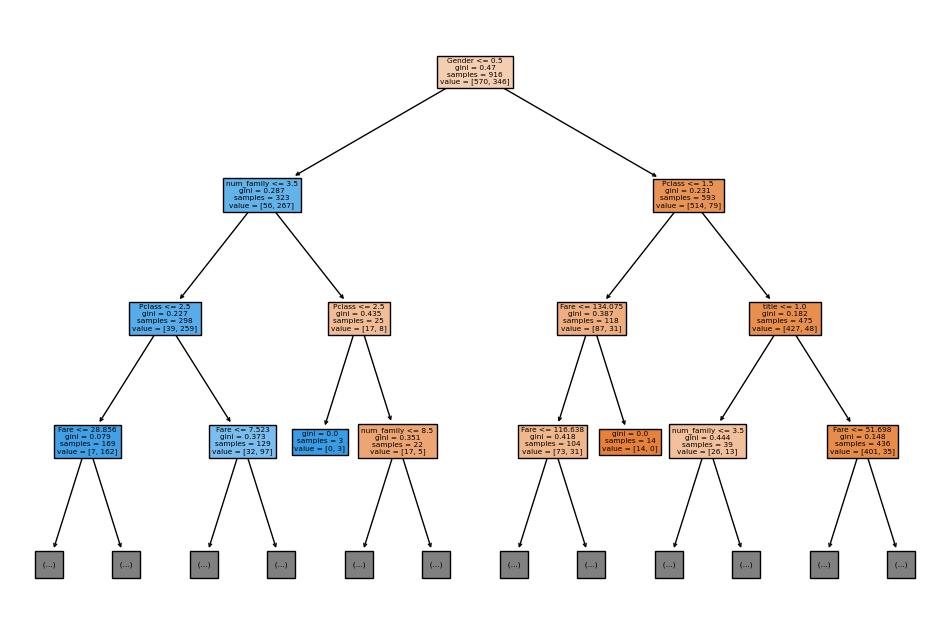

In [ ]:
### 필요한 함수 import
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 이미지의 크기 재설정
plt.figure(figsize=(12, 8))

# 시각화
plot_tree(dt, max_depth=3, feature_names=X_train.columns, filled=True)
plt.show()

## 평가용 데이터를 이용한 예측

In [ ]:
pred_test = dt.predict(X_test)
print(pred_test)

[1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0
 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1
 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0]


## 모델 평가

In [ ]:
# 필요한 함수 import
from sklearn.metrics import accuracy_score

# 평가용 데이터에 대한 정확도 평가
accuracy = accuracy_score(y_test, pred_test)

# 결과 학인하기
print(f'학습용 데이터에 대한 정확도 = {accuracy}')

학습용 데이터에 대한 정확도 = 0.821882951653944


## GridSearchCV를 이용한 모델 성능 최적화

In [ ]:
### GridSearchCV 함수 실행

# 필요한 함수 import
from sklearn.model_selection import GridSearchCV

# 최적화할 기본 모델 생성
base_dt = DecisionTreeClassifier(random_state=0)

# 튜닝할 매개 변수 설정
params = {'max_depth':[3,4,5,6,7,8,9]}

# GridSearchCV() 함수 호출, 모델 생성
grid_dt = GridSearchCV(estimator=base_dt,
                       param_grid=params,
                       scoring='accuracy',
                       cv=10)

# 학습 및 평가
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [ ]:
### 최적의 하이퍼파라미터 확인
print(grid_dt.best_params_)

{'max_depth': 3}


In [ ]:
### best 모델 완성
best_dt = DecisionTreeClassifier(max_depth=3, random_state=0)

### 모델 학습

In [ ]:
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### 학습 결과 시각화

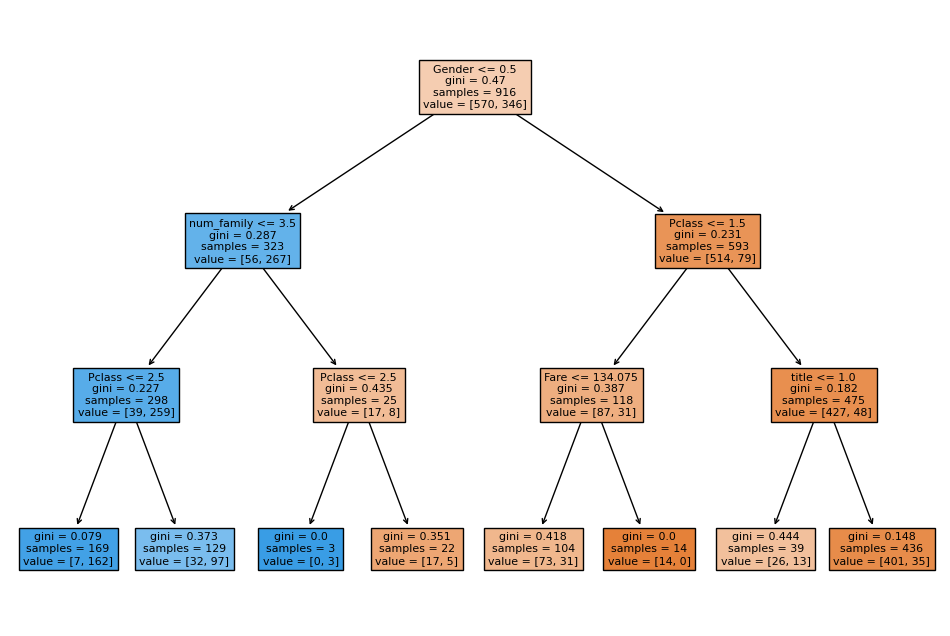

In [ ]:
# 필요한 라이브러리 / 함수 import
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 이미지 크기 재설정
plt.figure(figsize=(12,8))

# 시각화
plot_tree(best_dt, feature_names=X_train.columns, filled=True)
plt.show()

### 평가용 데이터를 이용한 예측

In [ ]:
pred_test = best_dt.predict(X_test)

### 모델 평가

In [ ]:
# 필요한 함수 import
from sklearn.metrics import accuracy_score

# 평가용 데이터에 대한 정확도 평가
accuracy = accuracy_score(y_test, pred_test)

# 결과 확인하기
print(f'평가용 데이터를 이용한 정확도 = {accuracy}')

평가용 데이터를 이용한 정확도 = 0.8702290076335878


# RandomForest 분류 모델을 이용한 타이타닉 데이터 분류

## 모델 생성

In [ ]:
### GridSearchCV 함수 사용

# 필요한 함수 import
from sklearn.ensemble import RandomForestClassifier

# 최적화 할 기본 모델 생성
base_rf = RandomForestClassifier(random_state=0)

# 튜닝할 매개 변수 설정
params = {'n_estimators':[100,200,300,400],
          'max_depth':[3,4,5,6,7]}

# GridSearchCV 함수 호출, 모델 생성
grid_rf = GridSearchCV(estimator=base_rf,
                       param_grid=params,
                       scoring='accuracy',
                       cv=10)

# 학습 및 평가
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [ ]:
### 최적의 하이퍼파라미터 조합 확인
print(grid_rf.best_params_)

{'max_depth': 4, 'n_estimators': 200}


In [ ]:
### best 모델 생성
best_rf = RandomForestClassifier(n_estimators=200, max_depth=4, random_state=0)

## 모델 학습

In [ ]:
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=0)

## 평가용 데이터를 이용한 예측

In [ ]:
pred_test = best_rf.predict(X_test)

## 모델 평가

In [ ]:
# 필요한 함수 import
from sklearn.metrics import accuracy_score

# 평가영 데이터에 대한 정확도 평가
accuracy = accuracy_score(y_test, pred_test)

# 결과 확인하기
print(f'평가용 데이터에 대한 정확도 = {accuracy}')

평가용 데이터에 대한 정확도 = 0.8676844783715013


# LightGBM 분류 모델을 이용한 타이타닉 데이터 분류

## 모델 생성

In [ ]:
## GridsearchCV 함수 사용

# 필요한 함수 import
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# 최적화 할 기본 모델 생성
base_lgbm = LGBMClassifier(random_state=0)

# 튜닝할 매개 변수 설정
params = {'n_estimators':[50,100,150,200],
          'learning_rate':[0.05,0.1,0.3],
          'max_depth':[3,4,5]}

# GridSearchCV 함수 호출, 모델 생성
grid_lgbm = GridSearchCV(estimator=base_lgbm,
                         param_grid=params,
                         scoring='accuracy',
                         cv=10)

# 모델 학습 및 평가
grid_lgbm.fit(X_train, y_train)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

GridSearchCV(cv=10, estimator=LGBMClassifier(random_state=0),
             param_grid={'learning_rate': [0.05, 0.1, 0.3],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
### 최적의 하이퍼파라미터 조합 확인
print(grid_lgbm.best_params_)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}


In [ ]:
### best 모델 생성
best_lgbm = LGBMClassifier(learning_rate=0.05,
                           max_depth=3,
                           n_estimators=50)

## 모델 학습

In [ ]:
best_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 346, number of negative: 570
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377729 -> initscore=-0.499198
[LightGBM] [Info] Start training from score -0.499198
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(learning_rate=0.05, max_depth=3, n_estimators=50)

## 평가용 데이터를 이용한 예측

In [ ]:
pred_test = best_lgbm.predict(X_test)

## 모델 평가

In [ ]:
# 필요한 함수 import
from sklearn.metrics import accuracy_score

# 평가용 데이터에 대한 정확도 평가
accuracy = accuracy_score(y_test, pred_test)

# 결과 확인하기
print(f'평가용 데이터에 대한 평가 결과 : {accuracy}')

평가용 데이터에 대한 평가 결과 : 0.8702290076335878


# XGBoost 모델을 이용한 타이타닉 데이터 분류

## 모델 생성

In [ ]:
## GridsearchCV 함수 사용

# 필요한 함수 import
from xgboost import XGBClassifier

# 최적화 할 기본 모델 생성
base_xgb = XGBClassifier(random_state=0)

# 튜닝할 매개 변수 설정
params = {'n_estimators':[50,100,150,200],
          'learning_rate':[0.05,0.1,0.3],
          'max_depth':[3,4,5]}

# GridSearchCV 함수 호출, 모델 생성
grid_xgb = GridSearchCV(estimator=base_xgb,
                         param_grid=params,
                         scoring='accuracy',
                         cv=10)

# 학습 및 성능 평가
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.3],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
### 최적의 하이퍼파라미터 조합 확인
print(grid_xgb.best_params_)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}


In [ ]:
### best 모델 생성
best_xgb = XGBClassifier(learning_rate=0.05,
                         n_estimators=50,
                         max_depth=3,
                         random_state=0)

## 모델 학습

In [ ]:
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

## 평가용 데이터를 이용한 예측

In [ ]:
pred_test = best_xgb.predict(X_test)

## 모델 평가

In [ ]:
# 평가용 데이터에 대한 정확도 평가
accuracy = accuracy_score(y_test, pred_test)

# 결과 확인하기
print(f'평가용 데이터에 대한 평가 결과 : {accuracy}')

평가용 데이터에 대한 평가 결과 : 0.8702290076335878
